## Random Forest - Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
#pd.set_option('display.width', 1000)
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.isnull().any().any()

False

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


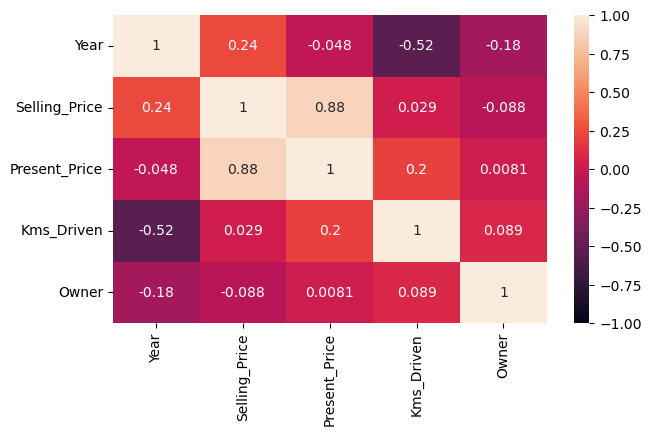

In [9]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
df["vehicle_age"]=2022-df.Year

# Datamızdaki araç üretim yılını age featurune dönüştürüyoruz.

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [13]:
df.select_dtypes("object").head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [14]:
for i in df.select_dtypes("object"):

    print(i, len(df[i].value_counts()))

# kategorik featurların kaç unique gözlemden oluştuğu görüyoruz. car_name'in unique kategorik gözlem sayısı datamızdaki toplam 
# gözlem sayısına nazaran çok yüksek.

Car_Name 98
Fuel_Type 3
Seller_Type 2
Transmission 2


In [15]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [16]:
df.drop(columns=["Car_Name","Year"], inplace=True)

# 301 gözlemim olmasına rağmen car_name'de 98 tane unique araba/motor markası mevcut. Bu featura ordinal encoder uygulayarak
# numeric verilere döünüştürmek anlamlı bir hareket tarzı olmayacak. Çünkü DT modeli high cardinality categorical featureslara 
# (çok fazla unique kategorik gözlemler içeren featurlar) daha fazla önem yükleme eğilimindedir. Bu da bu featurların feature
# importanceda daha ön plana çıkmasına sebep olur. 

# Ayrıca çoğu marka ve modelden 1-2 adet mevcut. Doğal olarak eğitime bir katkısı olmayacağından bu featura kaldırıyoruz.

# Araç üretim yılı olan Year featurını da Age featurına dönüştrdüğümüzden Year featurenıda car_name ile birlikte kaldırıyoruz.

In [17]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


<Axes: xlabel='Selling_Price', ylabel='Count'>

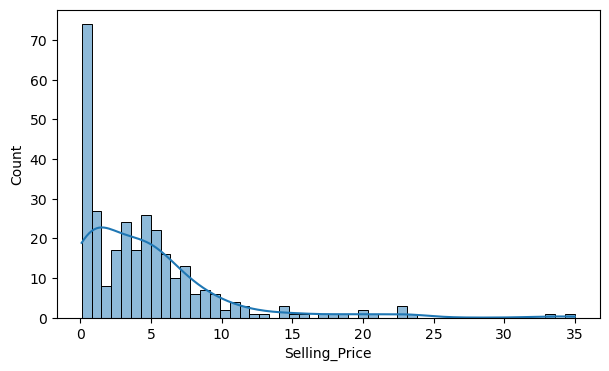

In [18]:
sns.histplot(df.Selling_Price, bins=50, kde=True);

# tree based modeller outlierlara karşı çok robustdur(güçlüdür). Ancak küçük regression datalarında bu durum geçerli değildir.
# Küçük regression datalarında outlier dağerler düştüğü yapraklardaki ortalama fiyatları ciddi şekilde yükseltebiliğinden veya 
# azaltabildiğinden eğitim için yetersiz olan bu outlier gözlemleri düşürmek tree based modellerde önem arzediyor.

# Ancak her zaman olduğu gibi hem outlierlar ile hem de outlierları düşürerek skorları karşılaştırıp farklarını görmeliyiz.

<Axes: >

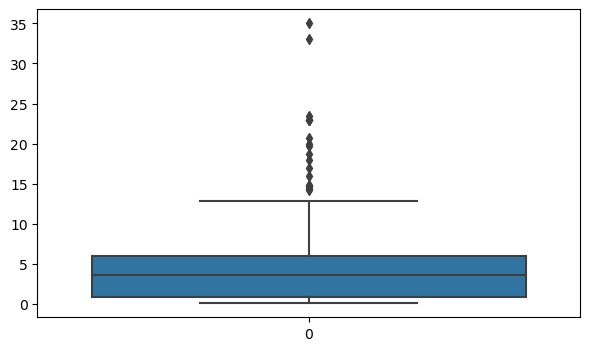

In [19]:
sns.boxplot(df.Selling_Price);

## Train test split

In [20]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 7)
Train target shape   :  (240,)
Test features shape  :  (61, 7)
Test target shape    :  (61,)


## Modeling with Pipeline

In [22]:
cat = X.select_dtypes("object").columns
cat

# classification notebokunda yaptığımız işlemleri aynen tekrarlıyoruz.

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [23]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), 
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestRegressor(random_state=101))])

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred, squared=True),                          
    "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred, squared=True),
    "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}
    
    return pd.DataFrame(scores)

In [26]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

# overfitting var gibi görünüyor.

,train,test
R2,0.985961,0.965562
mae,0.240712,0.552046
mse,0.357084,0.924336
rmse,0.597565,0.961424


In [27]:
from sklearn.model_selection import cross_validate

operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv =10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]
# overfitting olduğunu teyit ediyoruz.

test_r2                              0.861409
train_r2                             0.980934
test_neg_mean_absolute_error        -0.748755
train_neg_mean_absolute_error       -0.268161
test_neg_mean_squared_error         -3.328995
train_neg_mean_squared_error        -0.484614
test_neg_root_mean_squared_error    -1.563572
train_neg_root_mean_squared_error   -0.691895
dtype: float64

## Removing Outliers

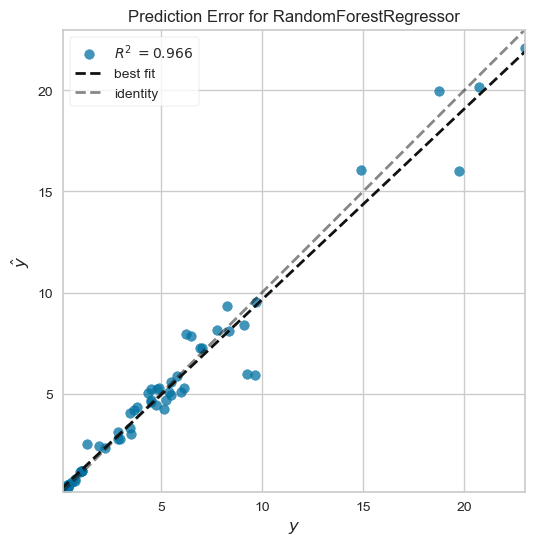

In [28]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 600))

model = pipe_model
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# 10 dan büyük fiyatların tahminleri bozduğunu gördük.

In [29]:
len(df[df.Selling_Price > 10])

28

In [30]:
28/301

0.09302325581395349

In [31]:
df_new = df[df.Selling_Price < 10]
df_new.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [32]:
X = df_new.drop(columns="Selling_Price")
y = df_new.Selling_Price

# filtrelenmiş dataya göre tekrar X ve y'mizi tekrar atadık.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# filtrelenmiş datamızı train ve test setlerine ayırdık

In [34]:
operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestRegressor(random_state=101))])

In [35]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

# overfiting hala var görünüyor. CV ile teyit edelim.

,train,test
R2,0.992649,0.954816
mae,0.152219,0.344851
mse,0.053044,0.308700
rmse,0.230312,0.555608


In [36]:
operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestRegressor(random_state=101))]

model = Pipeline(steps=operations)


scores = cross_validate(model,
                        X_train,
                        y_train, 
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'], 
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

# overfiting olduğunu teyit ettik.

test_r2                              0.942238
train_r2                             0.992223
test_neg_mean_absolute_error        -0.420447
train_neg_mean_absolute_error       -0.153716
test_neg_mean_squared_error         -0.393606
train_neg_mean_squared_error        -0.056044
test_neg_root_mean_squared_error    -0.616981
train_neg_root_mean_squared_error   -0.236593
dtype: float64

In [37]:
0.236/y.mean()

# train datasında ortalama yaklaşık %10 hata yapıyor.

0.06936543140759242

In [38]:
0.616/y.mean()

# train datasında ortalama yaklaşık %25 hata yapıyor.

0.18105553282659717

## Visualizing trees

In [39]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['Fuel_Type', 'Seller_Type', 'Transmission', 'Present_Price',
       'Kms_Driven', 'Owner', 'vehicle_age'], dtype=object)

In [70]:
from sklearn.tree import plot_tree

def report_model(model, number_of_tree):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(15,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree], filled=True, feature_names=features, fontsize=8);



         train      test
R2    0.925506  0.925198
mae   0.479379  0.493019
mse   0.537515  0.511050
rmse  0.733154  0.714878




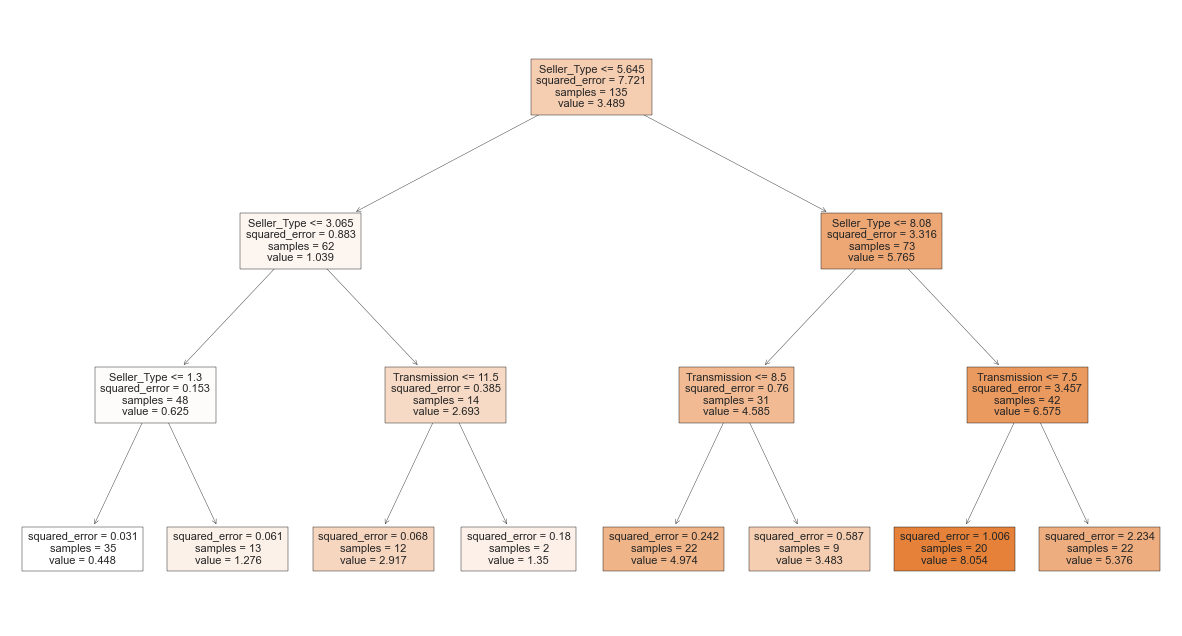

In [71]:
RF_model = RandomForestRegressor(n_estimators=250, max_depth=3, random_state=101)

operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RF_model)]

pruned_tree = Pipeline(steps=operations)
pruned_tree.fit(X_train,y_train)

report_model(pruned_tree, 10)

# classificationdan;
# 1.farkı criterion='squared_error'dür. Hatırlarsanız clasification da bu hyper_parametre gini, entropy veya 
# log_loss oluyordu. Regressionda criterion= "squared_error",  "absolute_error", "poisson" değerlerinden birini alabiliyor.
# Ama genellikle model en iyi sonuçları "squared_error"da aldığı için default olarak bu değer kullanılıyor.

# 2. farkı max_feature classification'da default olarak sqrt iken regressionda 1.0'dır. Yani tüm featurları kullanır. 

# squared error, mean squared error'ü temsil ediyor.Bir yaprağın errorünün 0 olması o yaparağa düşen tüm arabaların aynı fiyatta
# olduğunu gösterirken 0'a yakın bir değer olması fiyatları biribirine çok yakın arabalar olduğunu gösterir Yüksek bir error 
# değeri ise o yaprağa fiyatları biribirinden çok alakasız arabaların düştüğünü gösterir. 

# samples ilgili yapraktaki toplam gözlem sayısını gösterir. (boostrap metoduna göre train datasındaki gözlemlerin 
# yaklaşık 2/3'üdür)

# value ilgili yapraktaki gözlemlerin ortalama fiyatını gösterir.

# predict ettiğimiz bir gözle hangi yaprağa düşerse o yapraktaki value değeri arabanın model tarafından tahmin edilen değeri
# olur.

## GridSearch

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(random_state=101))]

model = Pipeline(steps=operations)

In [44]:
param_grid = {"RF_model__criterion":["squared_error", "absolute_error"],  # "poisson"
              "RF_model__n_estimators":[250, 500],
              "RF_model__max_depth": [1, 2],
              "RF_model__min_samples_leaf": [1, 2, 3],
              "RF_model__min_samples_split": [2, 3, 5],
              "RF_model__max_features":['auto', X.shape[1]/3, 6]}  # None, auto, 1.0 all same

# Random forestı gelistiren breman kendi aldığı notlarda agaç sayısı olarak 64,
# max_features içinde toplam features sayısının 1/3'ünü grid searchte denemek
# tavsiye edilmiş. 

# GridsearchCV overfitingi engelleyemez o yüzden parametre uzayını 
# ihtiyaca göre sınırlandırmamız gerekir.

In [45]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [46]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__criterion': ['squared_error',
                                                 'absolute_error'],
                         'RF_model__max_depth': [1, 2],
                         'RF_model__max_features': ['auto', 2.3333333333333335,
                                                    6],
                         'RF_model__min_samples_leaf': [1, 2, 3],
                         'RF_model__min_samples_split': [2, 3, 5],
                         'RF_model__n_estimators': [250, 500]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [47]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=2, max_features=6,
                                       min_samples_leaf=3, n_estimators=500,
                                       random_state=101))])

In [48]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

# overfiting yok

mean_test_score    -1.132006
mean_train_score   -1.067745
Name: 103, dtype: object

In [49]:
1.132/y.mean()

0.33271893370082467

In [50]:
1.067/y.mean()

0.3136140479317844

In [51]:
train_val(grid_model, X_train, y_train, X_test, y_test)

# overfiting yok gibi görünüyor.

,train,test
R2,0.841227,0.877932
mae,0.716301,0.659755
mse,1.145634,0.833971
rmse,1.070343,0.913220


In [52]:
operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestRegressor(max_depth=2, 
                                                 max_features=6, 
                                                 min_samples_leaf=3,
                                                 n_estimators=500,
                                                 random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train, 
                        y_train, 
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'], 
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

# overfiting olmadığını teyit ettik

test_r2                              0.814653
train_r2                             0.841922
test_neg_mean_absolute_error        -0.783709
train_neg_mean_absolute_error       -0.717751
test_neg_mean_squared_error         -1.322622
train_neg_mean_squared_error        -1.140403
test_neg_root_mean_squared_error    -1.132006
train_neg_root_mean_squared_error   -1.067745
dtype: float64

## Feature Importance

In [53]:
operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestRegressor(max_depth=2,
                                                 max_features=6,
                                                 min_samples_leaf=3, 
                                                 n_estimators=500,
                                                 random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# feature importance bulduğumuz en iyi hyper parametreleri kullanmamız gerektiğini unutmayalım

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=2, max_features=6,
                                       min_samples_leaf=3, n_estimators=500,
                                       random_state=101))])

In [54]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['Fuel_Type', 'Seller_Type', 'Transmission', 'Present_Price',
       'Kms_Driven', 'Owner', 'vehicle_age'], dtype=object)

In [55]:
pipe_model["RF_model"].feature_importances_

array([0.        , 0.12812545, 0.        , 0.81018144, 0.00448222,
       0.        , 0.05721089])

In [56]:
df_f_i = pd.DataFrame(data=pipe_model["RF_model"].feature_importances_, 
                      index=features,
                      columns=["Feature Importance"])
df_f_i = df_f_i.sort_values("Feature Importance", ascending=False)
df_f_i

,Feature Importance
Present_Price,0.810181
Seller_Type,0.128125
vehicle_age,0.057211
Kms_Driven,0.004482
Fuel_Type,0.000000
Transmission,0.000000
Owner,0.000000


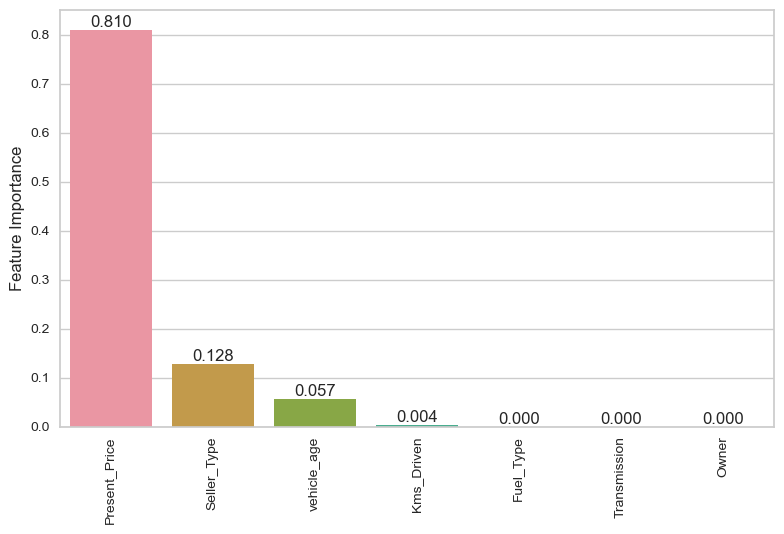

In [57]:
ax =sns.barplot(x = df_f_i.index, 
                y = 'Feature Importance', 
                data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation = 90)
plt.tight_layout()

# RF sonrası bir feature değeri 0 çıkıyorsa o featuren gerçekten tahminlemeye bir etkisi yok demektir. Çünkü
# RF tüm featurlardan insight alır.

## Feature Selection

In [58]:
X2 = X[["Present_Price", "Seller_Type", "vehicle_age"]]
X2.head()

# en kuvvetli ilk 3 feature seçiyoruz.

,Present_Price,Seller_Type,vehicle_age
0,5.59,Dealer,8
1,9.54,Dealer,9
2,9.85,Dealer,5
3,4.15,Dealer,11
4,6.87,Dealer,8


In [59]:
X_train,X_test,y_train,y_test=train_test_split(X2, y, test_size=0.2, random_state=5)

# Yeni datamıza göre train ve test datamızı tekrar belirliyoruz.

In [60]:
cat2 = ["Seller_Type"]

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat2), 
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")


operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(max_depth=2,
                                                 max_features=6, 
                                                 min_samples_leaf=3, 
                                                 n_estimators=500,
                                                 random_state=101))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train,y_train)
train_val(pipe_model, X_train, y_train, X_test, y_test)

# 3 feature ile benzer skorlar aldık.

,train,test
R2,0.838672,0.869676
mae,0.731083,0.684189
mse,1.164073,0.890378
rmse,1.078922,0.943598


In [61]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(max_depth=2,
                                                 max_features=6, 
                                                 min_samples_leaf=3, 
                                                 n_estimators=500,
                                                 random_state=101))]

model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train, 
                        y_train, 
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'], 
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

# overfiting olmadığını gördük

test_r2                              0.807048
train_r2                             0.838974
test_neg_mean_absolute_error        -0.804591
train_neg_mean_absolute_error       -0.732911
test_neg_mean_squared_error         -1.379245
train_neg_mean_squared_error        -1.161463
test_neg_root_mean_squared_error    -1.152160
train_neg_root_mean_squared_error   -1.077580
dtype: float64

## Final Model

In [62]:
X2.head()

# final modelimiz 3 feature ile kurmaya karar verdik.

,Present_Price,Seller_Type,vehicle_age
0,5.59,Dealer,8
1,9.54,Dealer,9
2,9.85,Dealer,5
3,4.15,Dealer,11
4,6.87,Dealer,8


In [63]:
pipe_model["OrdinalEncoder"].fit_transform(X2).head()

# make_column_transform fonksiyonun feature sırlamamızı değiştirdiğini tekrar hatırlayalım.

,Seller_Type,Present_Price,vehicle_age
0,0.0,5.59,8
1,0.0,9.54,9
2,0.0,9.85,5
3,0.0,4.15,11
4,0.0,6.87,8


In [64]:
cat2 = ["Seller_Type"]

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat2), 
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")


operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestRegressor(max_depth=2, 
                                                 max_features=6,
                                                 min_samples_leaf=3, 
                                                 n_estimators=500,
                                                 random_state=101))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X2, y)

# pipelinimızı kurup modeli eğitiyoruz.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Seller_Type'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=2, max_features=6,
                                       min_samples_leaf=3, n_estimators=500,
                                       random_state=101))])

## Prediction

In [65]:
samples = {"Present_Price": [7, 9. 5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type": ["Petrol", "Diesel"],
           'Seller_Type': ['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner": [0,1],
           "vehicle_age": [1, 9]}

In [66]:
df_samples = pd.DataFrame(samples)
df_samples

# modelim 3 featurla eğitilmiş olmasına rağmen tüm featurları versem bile prediction döndürebildi.

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.0,25000,Petrol,Dealer,Manual,0,1
1,9.5,44000,Diesel,Individual,Automatic,1,9


In [67]:
pipe_model.predict(df_samples)

array([5.5256958 , 5.62958899])